# Embedded ML - Lab 2.1: TensorFlow

In this lab you will learn the basics of one of the most developed and widely used ML libraries: TensorFlow. It implements many of the most important ML models and algorithms and has optimized back-ends for efficient execution on CPUs, GPUs, TPUs and other devices.

In this lab you are given some helper functions but you are expected to write most of the code and be able to explain it at a high level of abstraction and also to modify any part of it. This lab is important because a significant part of the course will use TensorFlow.

### Learning outcomes


* Explain the basic concepts associated with TensorFlow
* Use the basic workflow of TensorFlow to build a simple ML model
* Implement simple dense networks with TensorFlow and Keras
* Use some of the input handling functions of TensorFlow
* Implement a simple CNN with TensorFlow and Keras
* Implement transfer learning and fine tuning.

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

## TensorFlow workflow
As in general with ML, in TensorFlow you have to get or preprocess the model inputs, train the model, run inference and evaluate results.

Here you should use TensorFlow to build a dense 4-layer network to classify items in the FASHION MNIST dataset. Explore a few different hidden-layer sizes and report the accuracy achieved.

Finally, investigate how to export the model to a file and write a separate code that is able to load that model and run inference again.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


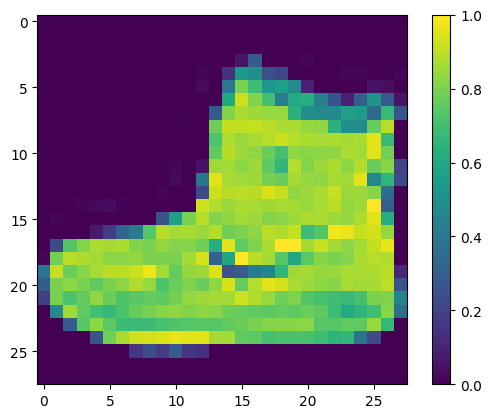

In [ ]:
# Pre-process input dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Create the model
model =  keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
for device in tf.config.list_physical_devices():
    print(device)
start = time.time()
model.fit(train_images, train_labels, epochs=10)
fin = time.time() - start
print(f'El tiempo de ejecución fue de {fin:4f} (s)')

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7823 - loss: 0.6233
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8637 - loss: 0.3731
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8766 - loss: 0.3346
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8852 - loss: 0.3103
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8889 - loss: 0.2951
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8945 - loss: 0.2793
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8985 - loss: 0.2665
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9037 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9078 - loss: 0.2454
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9091 - 

In [ ]:
# Evaluate functional performance
loss, accuracy = model.evaluate(test_images, test_labels)
# Save the model to a file
!mkdir -p saved_model
model.save('saved_model/my_model.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - loss: 0.3420


In [ ]:
# Instantiate model
#my_model = keras.Sequential()
# Load the saved model
new_model = tf.keras.models.load_model('saved_model/my_model.h5')
new_model.summary()
# Pre-process test inputs

# Verify functional performance
start = time.time()
loss, accuracy = new_model.evaluate(test_images, test_labels)
print(f"Tiempo en test {(time.time() - start):4f} (s)")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - loss: 0.3420
Tiempo en test 1.313150 (s)


### Comparing Sizes

In [ ]:
def Model(max_size):
  neurons = 2**(5+max_size)
  model =  keras.Sequential()
  model.add(layers.Input(shape=(28, 28)))
  model.add(layers.Flatten())
  for i in range(max_size):
    model.add(layers.Dense((int(neurons)), activation='relu'))
    neurons = neurons / 2
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  # Compile the model
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
# =========================
# Train different Models
# =========================
my_models_metrics = {}
max_hidden = 5
for i in range(1, max_hidden):
  print(f'Hidden Layers: {i}')
  my_model_n = Model(i)
  start = time.time()
  my_model_n.fit(train_images, train_labels, epochs=4)
  fin = time.time() - start
  print(f'El tiempo de ejecución fue de {fin:4f} (s)')
  loss, accuracy = my_model_n.evaluate(test_images, test_labels)
  print(f'Accuracy: {accuracy}')
  my_models_metrics[i] = [accuracy, fin]

print(my_models_metrics)

Hidden Layers: 1


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7728 - loss: 0.6711
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8593 - loss: 0.3962
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8700 - loss: 0.3589
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8807 - loss: 0.3343
El tiempo de ejecución fue de 20.019961 (s)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8786 - loss: 0.3582
Accuracy: 0.873199999332428
Hidden Layers: 2


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7822 - loss: 0.6234
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8609 - loss: 0.3811
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8753 - loss: 0.3420
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8845 - loss: 0.3089
El tiempo de ejecución fue de 21.975412 (s)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8682 - loss: 0.3514
Accuracy: 0.8705999851226807
Hidden Layers: 3


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7739 - loss: 0.6311
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8613 - loss: 0.3712
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8812 - loss: 0.3262
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8875 - loss: 0.3057
El tiempo de ejecución fue de 20.616868 (s)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8627 - loss: 0.3783
Accuracy: 0.863099992275238
Hidden Layers: 4


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7696 - loss: 0.6280
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8626 - loss: 0.3799
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8768 - loss: 0.3360
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8852 - loss: 0.3125
El tiempo de ejecución fue de 26.857293 (s)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8785 - loss: 0.3376
Accuracy: 0.8794999718666077
{1: [0.873199999332428, 20.0199613571167], 2: [0.8705999851226807, 21.975412368774414], 3: [0.863099992275238, 20.616868019104004], 4: [0.8794999718666077, 26.857292652130127]}


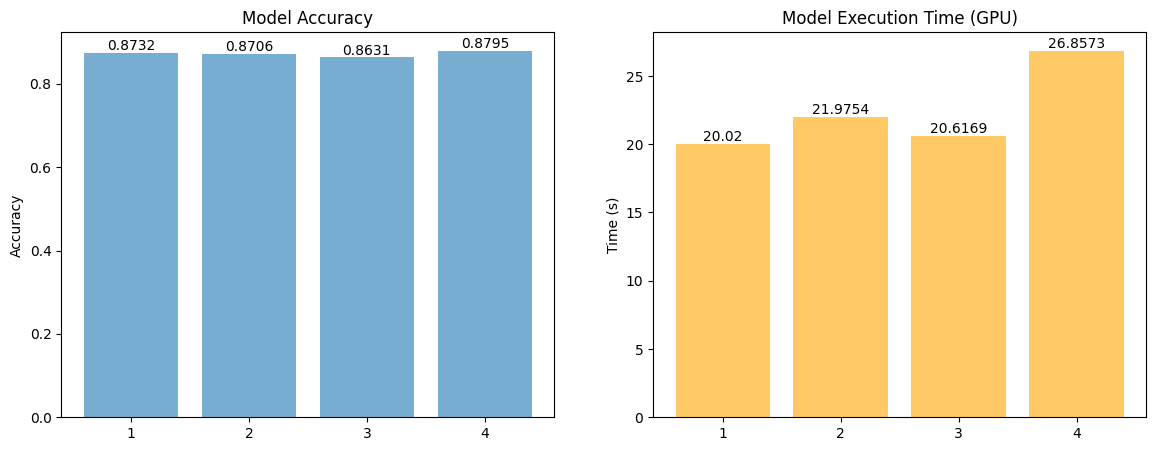

In [ ]:
# =========================
# Plot Model accuracies
# =========================
def plot_comparision(models:dict):
  model_names = list(models.keys())
  accuracies = [models[key][0] for key in models]
  times = [models[key][1] for key in models]
  fig, axs = plt.subplots(1, 2, figsize=(14, 5))

  bars1 = axs[0].bar(model_names, accuracies, alpha = 0.6)
  axs[0].set_xticks(model_names)
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Model Accuracy')

  bars2 = axs[1].bar(model_names, times, color = 'orange', alpha = 0.6)
  axs[1].set_xticks(model_names)
  axs[1].set_ylabel('Time (s)')
  axs[1].set_title('Model Execution Time (GPU)')

  for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')
  for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')
  plt.show()
plot_comparision(my_models_metrics)

## CNNs with TensorFlow
Convolutional Neural Networks add another type of processing layers to extract image features that allow the model to indentify patterns for a much better accuracy results in computer vision applications.

Implement a CNN model to classify the FASHION MNIST dataset and compare the accuracy results with the previous dense model. Also report a comparison of the model size measuring the saved model file size and through an analytical estimation.

In [ ]:
# =========================
# Pre-process input dataset
# =========================
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
# ====================
# Create the CNN model
# ====================
model =keras.models.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
# Compile the CNN model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ===============
# Train the model
# ===============
start = time.time()
history = model.fit(train_images, train_labels, epochs=4)
fin = time.time() - start
# ===============================
# Evaluate functional performance
# ===============================
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"Train accuracy: {history.history['accuracy'][-1]}")
print(f"Test accuracy: {test_acc}")
print(f'El tiempo de ejecución fue de {fin:4f} (s)')
# Save the model to a file
model.save('saved_model/my_cnn_model.h5')

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7442 - loss: 0.6921
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8758 - loss: 0.3415
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8948 - loss: 0.2894
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9069 - loss: 0.2566
313/313 - 1s - 4ms/step - accuracy: 0.8922 - loss: 0.2868


Train accuracy: 0.9078333377838135
Test accuracy: 0.8921999931335449
El tiempo de ejecución fue de 42.744474 (s)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


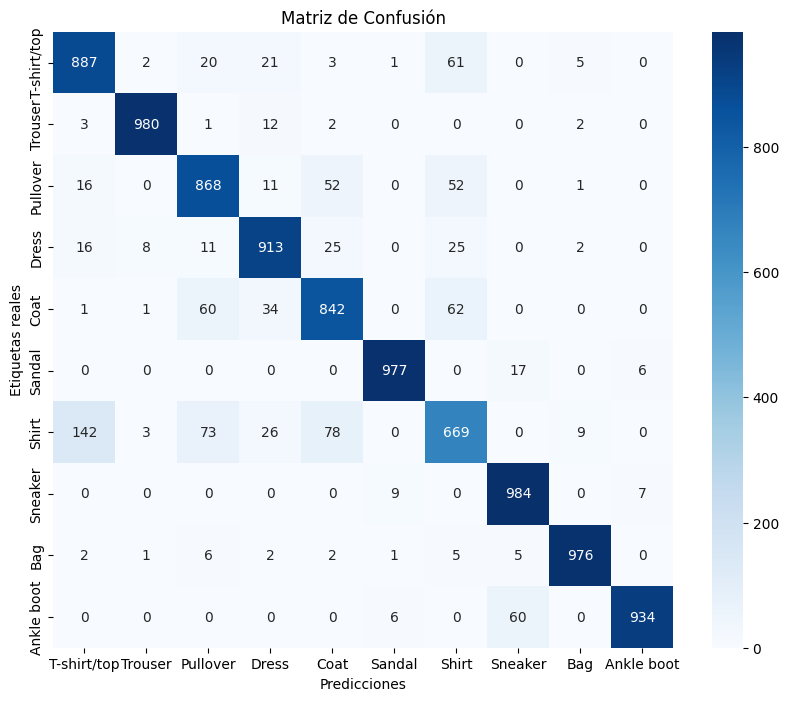

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las predicciones del modelo para los datos de prueba
y_pred_probs = model.predict(test_images)  # Obtiene las probabilidades de cada clase
y_pred = np.argmax(y_pred_probs, axis=1)  # Obtiene la clase con mayor probabilidad

# Obtener las etiquetas reales de los datos de prueba
y_true = np.argmax(test_labels, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas reales")
plt.title("Matriz de Confusión")
plt.show()

---

#### Model Size Analysis
* The number of parameters of both models are shown in the next table:

|| FC Model | CNN Model |
|---|---|---|
| Parameters| 109,388 | 93,322 KB |
| Size | 427.29 KB | 364.54 KB |

According to the arquitecture, the input size is $28 \times 28$, and the first "layer" is an Convolutional 2D using a $3 \times 3$, which will generate 32 features maps and will reduce the image size to $26 \times 26$.

The number of parameters for this layer is calculated where #Channels is = 1, Feature Maps= 32, #Kernel Values = 9:

* #Total Kernel values $\times$ #Feature Maps $\times$ #Channels

* $\to$ Parameters 1st Conv2D= $9 \times 32 \times 1$

The next conv layer will have $M$ feature maps, and each previous feature map will generate M feature maps in this current layer. (M = 64)

* $\to$ Parameters 2nd Conv2D = $ (9 \times 64 \times 1) \times 32$

* $\to$ Parameters 3rd Conv2D = $ (9 \times 64 \times 1) \times 64$




## Transfer learning and fine tuning
When you want to build a model but do not have enough data or resources to train a network with the accuracy you need, it possible to use a model that has been pre-trained on a large dataset and fine tune it with the target (smaller) dataset to solve the target classification problem.

Here you should use TensorFlow and Keras to download a pre-trained vision model from TensorFlow Hub (e.g. MobileNet V2), add a softmax classification layer and train it with a small subset of the Fashion MNIST dataset.

Compare runtimes and Top-1 accuracy of the resulting model with the dense and convolutional models previously built.



### Transfer Learning

In [ ]:
def load_preprocess(num_train, IMG_SIZE = (96,96)):
  fashion_mnist = keras.datasets.fashion_mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

  train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
  test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  num_classes = len(class_names)

  #====================================
  # Acomodar dimensiones de los datos
  #====================================
  train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
  test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

  # Seleccionar una porción para Transfer
  num_test = int(num_train * 0.2)

  # Nuevo tamaño train
  train_images = train_images[:num_train]
  train_labels = train_labels[:num_train]
  # Nuevo tamaño test
  test_images = test_images[:num_test]
  test_labels = test_labels[:num_test]
  # =====================
  # Acomodar dimensiones para ajustar al modelo
  # ====================
  train_images = tf.image.resize(train_images, IMG_SIZE)
  test_images = tf.image.resize(test_images, IMG_SIZE)
  # ======================
  # Pasar a 3 Canales
  # ======================
  train_images = tf.repeat(train_images, 3, -1)
  test_images = tf.repeat(test_images, 3, -1)

  return train_images, train_labels, test_images, test_labels

In [ ]:
IMG_SIZE = (96,96)
train_images_transfer, train_labels, test_images_transfer, test_labels = load_preprocess(2000, IMG_SIZE)

'''
To rescale an input in the [0, 255] range to be in the [-1, 1] range ...
you would pass scale=1./127.5, offset=-1.
'''
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)
# build a new model adding a softmax layer
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

#base_model.summary()

In [ ]:
# convert the features to a single 1280-element vector \
#per image using Global Average Pooling 2D or using Flatten()
num_classes = len(class_names)
model = tf.keras.Sequential([
        rescale,
        base_model,
        layers.Flatten(),
        # layers.Dense(128, activation='relu'),
        # layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
])
model.build(input_shape=(None, IMG_SIZE[0], IMG_SIZE[1], 3))
model.summary()
# compile and train the new model
base_learning_rate = 0.0001
model.compile('adam',#optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

EPOCHS = 10
init = time.time()
hist = model.fit(train_images_transfer,
                train_labels,
                 epochs=EPOCHS)
fin = time.time() - init
print(f'El tiempo de ejecución fue de {fin:4f} (s)')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │       115,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,373,194 (9.05 MB)

 Trainable params: 115,210 (450.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7122 - loss: 1.1309
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9071 - loss: 0.2829
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9670 - loss: 0.1034
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9749 - loss: 0.0618
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9925 - loss: 0.0281
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9988 - loss: 0.0098
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0039
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0030
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0022
El tiempo de ejecución fue de 17.532540 (s)


In [ ]:
loss, accuracy = model.evaluate(test_images_transfer, test_labels)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.8029 - loss: 0.8956


Using transfer learning it's possible to train a model with a costumed dataset using fewer data. There's a trade-off bewteen size of data set and the accuracy of the model in evaluation mode, because with few data the model might not generalize all the patterns.

Nevertheless, this is a great way to train a model with enough accuracy for the application when few data is available, allowing train fast and easily a model according to an arquitecture or pre-trained model. The new dataset must be related with the type of data that was used in the pre-trained model.

### Fine Tunning

In [ ]:
IMG_SIZE = (96,96)
train_FT, train_labels, test_FT, test_labels, num_classes = load_preprocess(10000, IMG_SIZE)

rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = True

model_FT = tf.keras.Sequential([
        rescale,
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')
])
model_FT.summary()
model_FT.build(input_shape=(None, IMG_SIZE[0], IMG_SIZE[1], 3))
base_learning_rate = 1e-5
model_FT.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
EPOCHS = 10

hist = model_FT.fit(train_FT,
                train_labels,
                batch_size=32,
                 epochs=EPOCHS)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.3920 - loss: 1.8350
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7769 - loss: 0.6595
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8463 - loss: 0.4805
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8727 - loss: 0.3839
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8915 - loss: 0.3237
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9047 - loss: 0.2938
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9156 - loss: 0.2488
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9360 - loss: 0.2013
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9380 - loss: 0.1871
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9507 - loss: 0.1584


In [ ]:
loss, accuracy = model_FT.evaluate(test_FT, test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.4346 - loss: 1.7323
